In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import random
import requests
from config import weather_api_key
from datetime import datetime

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

605

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID="+weather_api_key

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [8]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | daru
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | asau
Processing Record 4 of Set 1 | hermanus
Processing Record 5 of Set 1 | teahupoo
Processing Record 6 of Set 1 | castro
Processing Record 7 of Set 1 | barrow
Processing Record 8 of Set 1 | port alfred
Processing Record 9 of Set 1 | kasongo-lunda
Processing Record 10 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 11 of Set 1 | albany
Processing Record 12 of Set 1 | yuanping
Processing Record 13 of Set 1 | tabou
Processing Record 14 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 15 of Set 1 | khomutovo
Processing Record 16 of Set 1 | georgetown
Processing Record 17 of Set 1 | areosa
Processing Record 18 of Set 1 | katsuura
Processing Record 19 of Set 1 | tuchola
Processing Record 20 of Set 1 | gujrat
Processing Record 21 of Set 1 | jamestown
Processing Record 22 of Set 1 | auki
Processing Record 23 of Set 1 | arraial do cabo
Processing Rec

Processing Record 38 of Set 4 | mnogovershinnyy
Processing Record 39 of Set 4 | byron bay
Processing Record 40 of Set 4 | rocha
Processing Record 41 of Set 4 | zinder
Processing Record 42 of Set 4 | hithadhoo
Processing Record 43 of Set 4 | bereda
Processing Record 44 of Set 4 | xinqing
Processing Record 45 of Set 4 | magan
Processing Record 46 of Set 4 | tumannyy
City not found. Skipping...
Processing Record 47 of Set 4 | samusu
City not found. Skipping...
Processing Record 48 of Set 4 | itoman
Processing Record 49 of Set 4 | vicuna
Processing Record 50 of Set 4 | kamenka
Processing Record 1 of Set 5 | butka
Processing Record 2 of Set 5 | luderitz
Processing Record 3 of Set 5 | santarem
Processing Record 4 of Set 5 | poum
Processing Record 5 of Set 5 | tasiilaq
Processing Record 6 of Set 5 | belushya guba
City not found. Skipping...
Processing Record 7 of Set 5 | husavik
Processing Record 8 of Set 5 | gat
Processing Record 9 of Set 5 | dhidhdhoo
Processing Record 10 of Set 5 | pundagu

Processing Record 31 of Set 8 | kalmunai
Processing Record 32 of Set 8 | male
Processing Record 33 of Set 8 | esperance
Processing Record 34 of Set 8 | pekalongan
Processing Record 35 of Set 8 | shaunavon
Processing Record 36 of Set 8 | north bend
Processing Record 37 of Set 8 | bonthe
Processing Record 38 of Set 8 | ulaanbaatar
Processing Record 39 of Set 8 | nemuro
Processing Record 40 of Set 8 | tadine
Processing Record 41 of Set 8 | hasaki
Processing Record 42 of Set 8 | fuyu
Processing Record 43 of Set 8 | kahului
Processing Record 44 of Set 8 | tobermory
Processing Record 45 of Set 8 | kommunisticheskiy
Processing Record 46 of Set 8 | degirmen
City not found. Skipping...
Processing Record 47 of Set 8 | privokzalnyy
City not found. Skipping...
Processing Record 48 of Set 8 | sechura
Processing Record 49 of Set 8 | goteborg
City not found. Skipping...
Processing Record 50 of Set 8 | saint anthony
Processing Record 1 of Set 9 | renqiu
Processing Record 2 of Set 9 | yonago
Processing

City not found. Skipping...
Processing Record 17 of Set 12 | batemans bay
Processing Record 18 of Set 12 | kavaratti
Processing Record 19 of Set 12 | richards bay
Processing Record 20 of Set 12 | winslow
Processing Record 21 of Set 12 | anadyr
Processing Record 22 of Set 12 | ambilobe
Processing Record 23 of Set 12 | valparaiso
Processing Record 24 of Set 12 | calama
Processing Record 25 of Set 12 | limbang
Processing Record 26 of Set 12 | agadez
Processing Record 27 of Set 12 | komatipoort
Processing Record 28 of Set 12 | kuytun
Processing Record 29 of Set 12 | jurilovca
Processing Record 30 of Set 12 | maues
Processing Record 31 of Set 12 | libreville
Processing Record 32 of Set 12 | tevriz
Processing Record 33 of Set 12 | veshkayma
Processing Record 34 of Set 12 | longhua
Processing Record 35 of Set 12 | yeppoon
Processing Record 36 of Set 12 | ust-omchug
Processing Record 37 of Set 12 | ankang
Processing Record 38 of Set 12 | kulu
Processing Record 39 of Set 12 | lianzhou
Processin

In [49]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Saint Anthony,45.02,-93.22,82.99,57,1,3.36,US,2020-08-24 01:39:06
1,Ushuaia,-54.80,-68.30,32.00,93,90,9.17,AR,2020-08-24 01:34:10
2,Punta Arenas,-53.15,-70.92,33.80,86,20,24.16,CL,2020-08-24 01:35:40
3,Chokurdakh,70.63,147.92,38.14,76,100,10.47,RU,2020-08-24 01:39:06
4,Kyabe,9.45,18.94,71.31,96,100,3.51,TD,2020-08-24 01:39:07
5,Coffs Harbour,-30.30,153.13,64.00,27,0,11.41,AU,2020-08-24 01:39:07
6,Hithadhoo,-0.60,73.08,82.31,80,100,14.47,MV,2020-08-24 01:38:20
7,Nikolskoye,59.70,30.79,61.00,87,94,2.24,RU,2020-08-24 01:39:08
8,Albany,42.60,-73.97,69.01,90,16,2.24,US,2020-08-24 01:39:08
9,Bredasdorp,-34.53,20.04,55.40,93,100,2.24,ZA,2020-08-24 01:34:46


In [53]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [55]:
city_data_df=city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Saint Anthony,US,2020-08-24 01:39:06,45.02,-93.22,82.99,57,1,3.36
1,Ushuaia,AR,2020-08-24 01:34:10,-54.80,-68.30,32.00,93,90,9.17
2,Punta Arenas,CL,2020-08-24 01:35:40,-53.15,-70.92,33.80,86,20,24.16
3,Chokurdakh,RU,2020-08-24 01:39:06,70.63,147.92,38.14,76,100,10.47
4,Kyabe,TD,2020-08-24 01:39:07,9.45,18.94,71.31,96,100,3.51
...,...,...,...,...,...,...,...,...,...
550,Arkhara,RU,2020-08-24 01:42:11,49.42,130.08,73.69,64,100,13.06
551,Ust-Kuyga,RU,2020-08-24 01:42:11,70.02,135.60,45.21,60,20,14.52
552,Gorodets,RU,2020-08-24 01:42:12,56.65,43.48,61.00,87,100,4.47
553,Dhidhdhoo,MV,2020-08-24 01:38:19,6.88,73.10,83.14,70,69,7.54


In [56]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [57]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [58]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1598235100.0456548

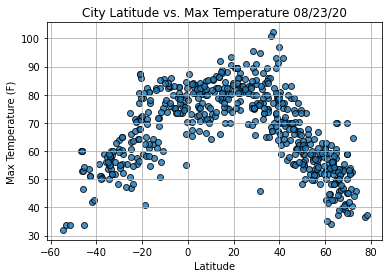

In [59]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

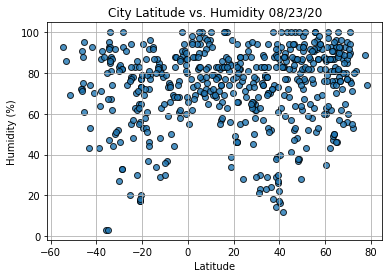

In [61]:
#Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

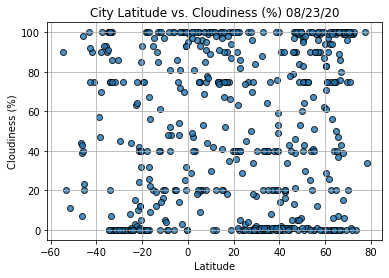

In [62]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

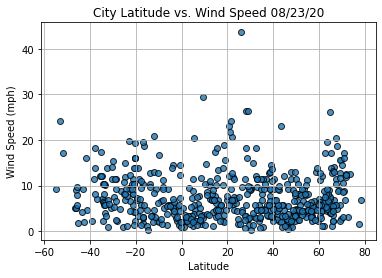

In [63]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [64]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [69]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [70]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Saint Anthony,US,2020-08-24 01:39:06,45.02,-93.22,82.99,57,1,3.36
3,Chokurdakh,RU,2020-08-24 01:39:06,70.63,147.92,38.14,76,100,10.47
4,Kyabe,TD,2020-08-24 01:39:07,9.45,18.94,71.31,96,100,3.51
7,Nikolskoye,RU,2020-08-24 01:39:08,59.70,30.79,61.00,87,94,2.24
8,Albany,US,2020-08-24 01:39:08,42.60,-73.97,69.01,90,16,2.24
...,...,...,...,...,...,...,...,...,...
549,Povenets,RU,2020-08-24 01:42:10,62.85,34.83,56.16,91,99,7.52
550,Arkhara,RU,2020-08-24 01:42:11,49.42,130.08,73.69,64,100,13.06
551,Ust-Kuyga,RU,2020-08-24 01:42:11,70.02,135.60,45.21,60,20,14.52
552,Gorodets,RU,2020-08-24 01:42:12,56.65,43.48,61.00,87,100,4.47


In [71]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

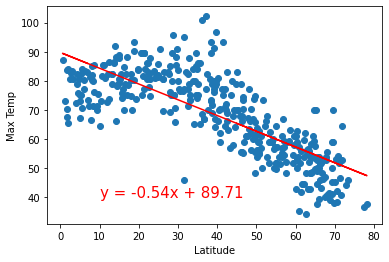

In [76]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,40))

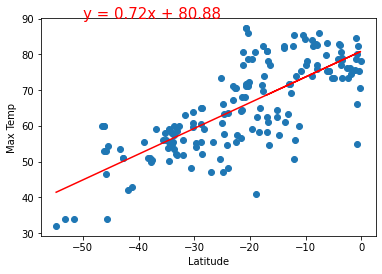

In [78]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))

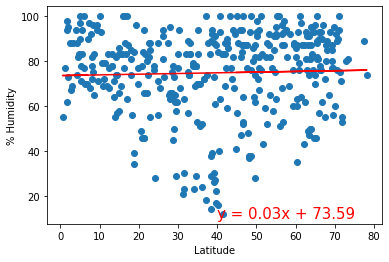

In [81]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))

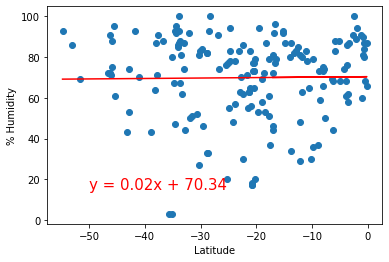

In [83]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

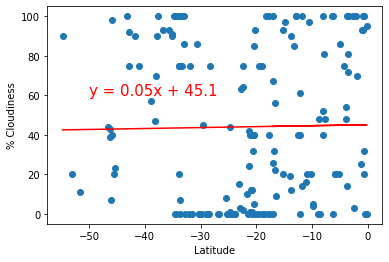

In [88]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

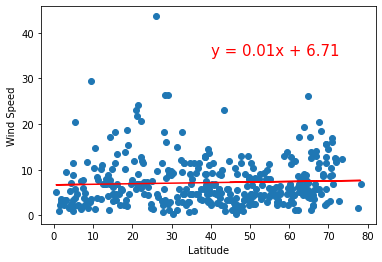

In [90]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))

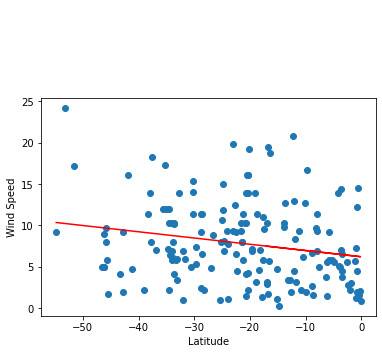

In [96]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,35))